Данные взяты с сайта https://ourworldindata.org/obesity

Гипотеза "Если в России, людей страдающих ожирением, становится больше, то в США этот показатель тоже растет"

Данные на сайте предоставляются по множеству стран в формате .csv с 1975 года по 2016 год.

Первым делом импортируются библиотеки:

In [247]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Смотрим информацию по колонкам:

In [248]:
df = pd.read_csv('obesity.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8484 entries, 0 to 8483
Data columns (total 4 columns):
 #   Column                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                     --------------  -----  
 0   Entity                                                                                                     8484 non-null   object 
 1   Code                                                                                                       8064 non-null   object 
 2   Year                                                                                                       8484 non-null   int64  
 3   Indicator:Prevalence of obesity among adults, BMI &GreaterEqual; 30 (crude estimate) (%) - Sex:Both sexes  8484 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 265.3+ KB
None


Так как нам нужны только две страны, то следует их отделить

In [249]:
usaData = df[df['Entity'] == 'United States']
russiaData = df[df['Entity'] == 'Russia']

Далее нужно создать фигуры, где будут располагаться графики.

In [250]:
figure = plt.figure(figsize=(10, 10))
figure2 = plt.figure(figsize=(10, 10))
figure3 = plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

Далее распределим будущие графики по фигурам:

In [251]:
axes1 = figure.add_subplot(2, 2, 1)
axes2 = figure.add_subplot(2, 2, 2)
axes3 = figure2.add_subplot()
axes4 = figure3.add_subplot()

Построение графика для США

In [252]:
axes1.plot(usaData['Year'], usaData['Indicator:Prevalence of obesity among adults, BMI &GreaterEqual; 30 (crude estimate) (%) - Sex:Both sexes'],
           color='red',
           linewidth=2,
           label='США')
axes1.set_title('США')
axes1.set_xlabel('Год')
axes1.set_ylabel('Ожирение (%)')
axes1.grid()
axes1.legend()

Здесь в качестве оси OX идут года, а индекс массы тела в качестве оси OY. 
И еще график настроен немного косметически: выбран красный цвет, толщина линии поставлена в значение 2 и дан лейбл, который потом будет отображаться в легенде.
Графику дано название, подписаны оси и выставлена сетка. Также включено отображение легенды.


График для России делается аналогичным образом:

In [253]:
axes2.plot(russiaData['Year'], russiaData['Indicator:Prevalence of obesity among adults, BMI &GreaterEqual; 30 (crude estimate) (%) - Sex:Both sexes'],
           linewidth=2,
           label='Россия',
           color='blue')
axes2.set_title('Россия')
axes2.set_xlabel('Год')
axes2.set_ylabel('Ожирение (%)')
axes2.grid()
axes2.legend()

Во второй фигуре следует отобразить сравнение первого и второго графиков. 

In [254]:
axes3.plot(usaData['Year'], usaData['Indicator:Prevalence of obesity among adults, BMI &GreaterEqual; 30 (crude estimate) (%) - Sex:Both sexes'],
           label='США',
           color='red',
           linewidth=2)
axes3.plot(russiaData['Year'], russiaData['Indicator:Prevalence of obesity among adults, BMI &GreaterEqual; 30 (crude estimate) (%) - Sex:Both sexes'],
           label='Россия',
           color='blue',
           linewidth=2)
axes3.set_title('Сравнение ожирения в США и России')
axes3.set_xlabel('Год')
axes3.set_ylabel('Ожирение (%)')
axes3.grid()
axes3.legend()

Далее делаем MultiIndex

Чтобы сделать MultiIndex я взял статистику по норвежским кронам

In [255]:
dF = pd.read_excel('norwKr.xlsx')

dF.drop(['nominal', 'cdx'], inplace=True, axis=1)
dF['data'] = pd.to_datetime(dF['data'])
dF.index = dF['data']

dF['Year'] = dF.index.year
dF['Month'] = dF.index.month
dF['Day'] = dF.index.day
dates = dF[['Year', 'Month', 'Day']]

dF.index = pd.MultiIndex.from_tuples(dates.values.tolist(), names=dates.columns)

print(dF.head(10))

N:\Programs\Optional\anaconda\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


                     data     curs  Year  Month  Day
Year Month Day                                      
2024 2     29  2024-02-29  87.2477  2024      2   29
           28  2024-02-28  87.3998  2024      2   28
           27  2024-02-27  88.1178  2024      2   27
           23  2024-02-23  88.4514  2024      2   23
           22  2024-02-22  88.1502  2024      2   22
           21  2024-02-21  88.0319  2024      2   21
           20  2024-02-20  87.6292  2024      2   20
           17  2024-02-17  87.5145  2024      2   17
           16  2024-02-16  86.7661  2024      2   16
           15  2024-02-15  87.3139  2024      2   15


Для вывода тепловой карты нужно немного подредактировать данные

In [256]:
russiaData = df[df['Entity'] == 'Russia']
russiaData = russiaData.drop(columns=['Code', 'Entity'])
russiaData = russiaData.rename(columns={"Indicator:Prevalence of obesity among adults, BMI &GreaterEqual; 30 (crude estimate) (%) - Sex:Both sexes": "BMI RUS"})
russiaData = russiaData.reset_index(drop=True)

usaData = df[df['Entity'] == 'United States']
usaData = usaData.drop(columns=['Entity', 'Code', 'Year'])
usaData = usaData.rename(columns={"Indicator:Prevalence of obesity among adults, BMI &GreaterEqual; 30 (crude estimate) (%) - Sex:Both sexes": "BMI USA"})
usaData = usaData.reset_index(drop=True)

Далее объединим таблицы

In [257]:
hopelessData = pd.concat([russiaData, usaData], axis=1)
hopelessData.head(10)

,Year,BMI RUS,BMI USA
0,1975,14.2,11.7
1,1976,14.5,12.1
2,1977,14.7,12.4
3,1978,15.0,12.7
4,1979,15.3,13.1
5,1980,15.5,13.5
6,1981,15.8,13.9
7,1982,16.1,14.3
8,1983,16.4,14.8
9,1984,16.7,15.2


In [258]:
corrData = hopelessData.corr()

corrData

,Year,BMI RUS,BMI USA
Year,1.000000,0.996001,0.996112
BMI RUS,0.996001,1.000000,0.989597
BMI USA,0.996112,0.989597,1.000000


<Axes: >

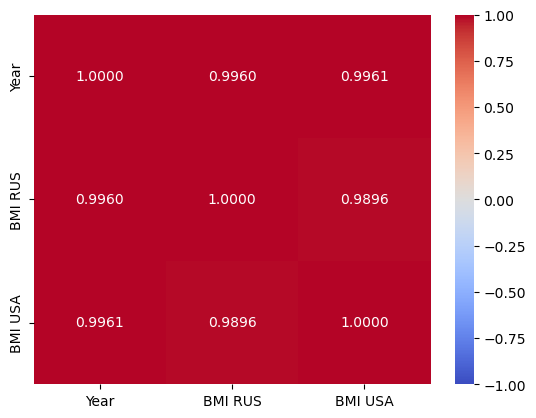

In [259]:
sns.heatmap(corrData, annot=True, cmap='coolwarm', fmt=".4f", vmin=-1, vmax=1)

In [260]:
print(hopelessData['BMI RUS'].corr(hopelessData['BMI USA']))

0.9895971072810086
